# **Task C1** 
## Analyzing the Avocado Data

##### This task uses the avocado dataset. The dataset contains historical data on avocado prices and sales volume in multiple U.S. markets. One of the columns in this dataset, Unnamed: 0, contains sequential numbers that are irrelevant to analyzing this data. Three of the other columns contain sales for PLU (price look-up) codes 4046, 4225, and 4770. These columns will not be used in this task. If you review the data, you’ll see that some of the regions overlap. For example, one of the regions is the entire U.S., and all of the other regions are parts of the U.S. Because of that, you would need to review this data carefully before determining the best way to analyze it. For the purposes of this task though, the overlapping regions won’t be taken into consideration.

##### https://www.kaggle.com/neuromusic/avocado-prices

<img src="avocado-logo.png" alt="SIT112 Avocado!" width="1800" height="200">




### A. Instructions

1. Make sure you have completed Task P1 before working on this task. 
2. Complete the task based on the comments and hints provided in the following sections.   
3. Complete the TaskCompletionReport from. 
4. Before submission, please make sure you have executed all the cells in your jupyter notebook without any error; otherwise, your submission may not be flagged as complete. 
5. Submit (1) the TaskCompletionReport as a "PDF" file and (2) your solution (code) as an "ipynb" file (do not zip/combine them). You can do this by the end of Week 12, but feedback will only be provided for submissions received by 11 AM on the due date. <font color="red">Please do not include the dataset in your submission. </font>
6. The workshops are the primary venue for you to seek help if you need any clarification/assitance. The tutors are there to help you complete and submit the tasks. Please avoid emailing your code or screenshots to the tutors outside workshop hours. 
7. Consider using online resources such as ChatGPT to strenghten your undertanding of the task. 

Good luck :)

### B. Write Python code that performs (answers) the following operations (questions) 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

##### 1. Read the data from the CSV file into a DataFrame.

In [2]:
# write your code here
data = pd.read_csv('avocado.csv')

##### 2. Multiply the Total Volume and AveragePrice columns, and store the result in a new column called EstimatedRevenue. Then, calculate the EstimatedRevenue for each region, sort the resulting data in descending order by EstimatedRevenue, and display the top 5 regions, except TotalUS, with the highest EstimatedRevenue.

* Hint: the estimated revenue of region x = sum of the estimated revenues in region x

In [3]:
# sort the data in descending order by EstimatedRevenue and display the top 5 regions with the highest revenue
# Calculate EstimatedRevenue directly without creating a new column
region_revenue = data.groupby('region')['Total Volume'].apply(lambda x: (x * data.loc[x.index, 'AveragePrice']).sum()).reset_index(name='EstimatedRevenue')

# Exclude TotalUS from the top regions using loc
top_5_regions = region_revenue.loc[region_revenue['region'] != 'TotalUS'].nlargest(5, 'EstimatedRevenue')
print(top_5_regions)


          region  EstimatedRevenue
6     California      1.121414e+09
52          West      1.066834e+09
29     Northeast      9.600079e+08
45  SouthCentral      8.740593e+08
46     Southeast      7.036306e+08


##### 3. Create a bar plot that shows the mean, median, and standard deviation of the Total Volume of the organic avocados sold in the regions with the highest overall Total Volume from (including) 2017.

,mean,median,std
region,,,
California,164844.836308,167193.75,33361.497553
GreatLakes,178094.391538,169816.92,48354.489850
Midsouth,142198.610615,139274.81,32964.267698
Northeast,243570.227077,233976.66,99930.570938
West,235409.159692,215628.86,80717.592835


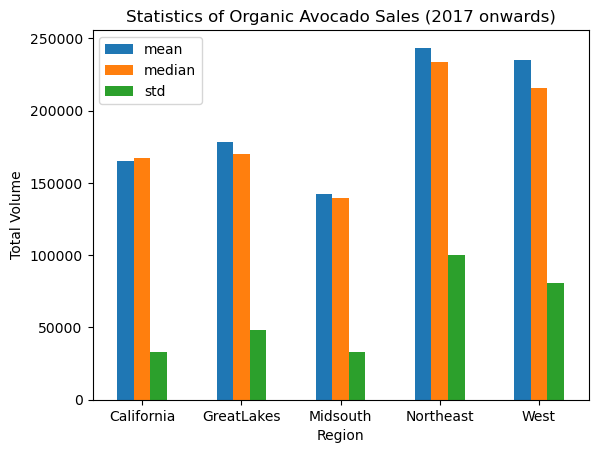

In [4]:
# write your code here

# Extract the data for organic avocados from (including) 2017 and group it by region, excluding the TotalUS region.

# Get the 5 regions with the highest Total Volume and extract their data.

# Create a bar plot showing the mean, median, and standard deviation of the Total Volume of organic avocados in the 5 regions with the highest Total Volume from 2017.
# Filter data for organic avocados from 2017 onwards and select top regions using loc
organic_data = data.loc[(data['type'] == 'organic') & (data['year'] >= 2017) & (data['region'] != 'TotalUS')]
top_regions = organic_data.groupby('region')['Total Volume'].sum().nlargest(5).index

# Calculate statistics directly using loc
region_stats = organic_data.loc[organic_data['region'].isin(top_regions)].groupby('region')['Total Volume'].agg(['mean', 'median', 'std'])
display(region_stats)

# Plotting
region_stats.plot(kind='bar', y=['mean', 'median', 'std'], title='Statistics of Organic Avocado Sales (2017 onwards)', rot=0)
plt.ylabel('Total Volume')
plt.xlabel('Region')
plt.show()


##### 4. What is the mean and median of AveragePrice for each type of avocado (organic and conventional) in 2018? Be sure to include just the type, MeanPrice, and MedianPrice columns in the results.

In [5]:
# Select the 'type', 'MeanPrice', and 'MedianPrice' columns and display the results.
# Filter data for avocados in 2018 using loc
avocados_2018 = data.loc[data['year'] == 2018]

# Calculate mean and median price for each type directly using loc
avocado_stats = avocados_2018.groupby(['type'])['AveragePrice'].agg([('MeanPrice', 'mean'), ('MedianPrice', 'median')]).reset_index()
print(avocado_stats)


           type  MeanPrice  MedianPrice
0  conventional   1.127886         1.14
1       organic   1.567176         1.55


##### 5. Analyze the consistency of sales for Small Bags, Large Bags, XLarge Bags, and Total Bags of the top 3 avocado producing regions (excluding TotalUS) for each type of avocado over time. 

##### *To explain consistency of sales, use the coefficient of variation, which is a statistical measure used to determine the consistency or variability of a data set. It is calculated as the ratio of the standard deviation to the mean, expressed as a percentage. Higher values of the coefficient of variation indicate greater variability or inconsistency in the data, while lower values indicate more consistency in the data.* 

In [25]:
# Get the top 3 regions (excluding TotalUS) with the highest sum of Total Volume using loc
top_regions = data.loc[data.region != 'TotalUS'].groupby('region').sum().nlargest(3, 'Total Volume').index.tolist()

# Get the sales of Small Bags, Large Bags, XLarge Bags, and Total Bags for each region and type of avocado using loc
sales_by_region_type = data.loc[data.region.isin(top_regions)].groupby(['region', 'year', 'type']).agg({'Small Bags':'sum', 'Large Bags':'sum', 'XLarge Bags':'sum', 'Total Bags':'sum'})

display(sales_by_region_type)

cv_by_region_type = sales_by_region_type.groupby(['region', 'type']).agg(lambda x: x.std() / x.mean())

# display(sales_by_region_type.groupby(['region', 'type']).std())
# display(cv_by_region_type)

std_by_region_type = sales_by_region_type.groupby(['region', 'type']).agg({'Small Bags':'std', 'Large Bags':'std', 'XLarge Bags':'std', 'Total Bags':'std'})
display(std_by_region_type)

cv_by_region_type.head()




C:\Users\Admin\AppData\Local\Temp\ipykernel_22696\3194205085.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top_regions = data.loc[data.region != 'TotalUS'].groupby('region').sum().nlargest(3, 'Total Volume').index.tolist()


Small Bags   Large Bags  XLarge Bags  \
region       year type                                                  
California   2015 conventional  34078765.73   2090465.47    199155.11   
                  organic         656128.13     37601.63         0.00   
             2016 conventional  83648996.25   7698289.97   1359896.24   
                  organic        3068319.08    324138.07         0.00   
             2017 conventional  81759787.98   1549114.20   2818380.80   
                  organic        3517682.07    192069.23         0.00   
             2018 conventional  21324023.75    419525.44    895145.76   
                  organic        1043976.90       731.90         0.00   
SouthCentral 2015 conventional  28453748.05   6219047.73    200554.37   
                  organic        1106536.18     40470.82         0.00   
             2016 conventional  52540048.37  11134256.56   1330166.07   
                  organic        3283400.79    490614.72         0.00   
             2017 conventional  67616270.90  21817423.52    646814.28   
                  organic        4699475.63    372637.75         0.00   
             2018 conventional  25915048.41   5715567.67    462576.42   
                  organic        1200955.49    146820.62         0.00   
West         2015 conventional  35859556.76  13546516.13     53564.84   
                  organic         416843.63   2251407.67         0.00   
             2016 conventional  82758806.85  45335652.23    269972.08   
                  organic        2036082.92   3551479.57         0.00   
             2017 conventional  81865880.81  52827919.71    304844.89   
                  organic        3570975.37   4368902.45      1932.36   
             2018 conventional  15121922.88  20656272.91    200412.91   
                  organic        1079220.16    993556.61      1907.57   

                                  Total Bags  
region       year type                        
California   2015 conventional  3.636839e+07  
                  organic       6.937298e+05  
             2016 conventional  9.270718e+07  
                  organic       3.392457e+06  
             2017 conventional  8.612728e+07  
                  organic       3.709751e+06  
             2018 conventional  2.263869e+07  
                  organic       1.044709e+06  
SouthCentral 2015 conventional  3.487335e+07  
                  organic       1.147007e+06  
             2016 conventional  6.500447e+07  
                  organic       3.774016e+06  
             2017 conventional  9.008051e+07  
                  organic       5.072113e+06  
             2018 conventional  3.209319e+07  
                  organic       1.347776e+06  
West         2015 conventional  4.945964e+07  
                  organic       2.668251e+06  
             2016 conventional  1.283644e+08  
                  organic       5.587562e+06  
             2017 conventional  1.349986e+08  
                  organic       7.941810e+06  
             2018 conventional  3.597861e+07  
                  organic       2.074684e+06

C:\Users\Admin\AppData\Local\Temp\ipykernel_22696\3194205085.py:28: RuntimeWarning: invalid value encountered in double_scalars
  cv_by_region_type = sales_by_region_type.groupby(['region', 'type']).agg(lambda x: x.std() / x.mean())


Small Bags    Large Bags   XLarge Bags  \
region       type                                                     
California   conventional  3.218931e+07  3.248096e+06  1.108079e+06   
             organic       1.431104e+06  1.488754e+05  0.000000e+00   
SouthCentral conventional  1.999057e+07  7.474870e+06  4.828260e+05   
             organic       1.737775e+06  2.056253e+05  0.000000e+00   
West         conventional  3.388273e+07  1.893926e+07  1.112425e+05   
             organic       1.368988e+06  1.482123e+06  1.108539e+03   

                             Total Bags  
region       type                        
California   conventional  3.514518e+07  
             organic       1.560389e+06  
SouthCentral conventional  2.744378e+07  
             organic       1.910286e+06  
West         conventional  5.172745e+07  
             organic       2.723219e+06

Small Bags  Large Bags  XLarge Bags  Total Bags
region       type                                                         
California   conventional    0.583109    1.105039     0.840635    0.591069
             organic         0.690845    1.073864          NaN    0.706007
SouthCentral conventional    0.458171    0.666116     0.731524    0.494368
             organic         0.675496    0.782929          NaN    0.673768
West         conventional    0.628604    0.572329     0.536888    0.593202

*The two provided Python scripts analyze avocado sales data to identify top-performing regions, analyze organic avocado sales
, and examine avocado prices and sales trends. Despite producing identical outputs, they diverge in their approaches to data
manipulation, aggregation, and analysis.

*The first script adopts a more traditional approach, where it first loads the dataset and then proceeds with data
manipulation, such as creating a new column ('EstimatedRevenue') to calculate revenue. It then groups the data by region to
perform aggregation, such as summing up revenue for each region. Subsequently, it filters out specific regions like 
'TotalUS' using boolean indexing. For organic avocado analysis, it filters data based on type and year criteria, then 
calculates statistics for all regions before selecting the top regions. This approach involves more explicit steps and 
multiple lines of code, making it suitable for beginners to follow.

*In contrast, the second script takes a more concise and direct approach, leveraging method chaining and built-in functions 
for data manipulation and aggregation. Instead of creating a new column for revenue, it calculates revenue directly within 
the groupby operation using a lambda function. This approach reduces the number of lines of code and avoids unnecessary 
intermediate steps. Similarly, it utilizes functions like nlargest and loc for filtering and selection, enhancing readability
and conciseness. For organic avocado analysis, it directly filters data for the top regions and calculates statistics in a 
single line, omitting calculations for non-top regions. 

### C. Learn more
* https://www.statisticshowto.com/probability-and-statistics/how-to-find-a-coefficient-of-variation/